<a href="https://colab.research.google.com/github/paras-lehana/utils/blob/master/algo/Karatsuba_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Karatsuba Algorithm - Part II

---

- Find about Karatsuba in [Part 1](https://drive.google.com/open?id=1nMi3HU_etqDiY3FcKd9hcE-rBz2QiL_7). 

- I had still used standard multiplication operator (*) for single digit numbers and calculating $B^m$. As stated [here](https://drive.google.com/open?id=1kaXimfXi0oVTg-T7Qa5t5ucBpY6IRdBR), we will be using bit manipulations. 




---

# Homework Assignment

*As this week’s assignment, modify the Karatsuba/Simple multiplication functions
implemented in last week’s homework to count the total number of single digit
multiplications and the total number of add/subtract operations.*

*Run these functions for multiplying two random integers of k digits each (0<k<20) and print the above counts. Also, plot these counts against the number of digits k, and report your conclusions.*


- Set `DISPLAY_STEPS` to `True` for seeing each step in the algorithm.
- Change `ITERATIONS` for changing number of points of k-digit points generated for graph plotting. 

- SDM is Single Digit Multiplications according to the base.
- ASO is Addition & Subtraction operation and is incremented whenever a single +/- is encountered. Change the increment as per your requirements. 

- The normal multiplication has two methods (provided in parameter `method`): `add` and `school`. The 'add' method multiplies x and y by adding x y times whereas the 'school' method divides the number to break multiplication in single digit steps. The single digit multiplication is still handled by 'add' method whereas `mdict` could also be used (commented) to store all possible single digit multiplications. 

- The Karatsuba multiplication also has two methods (provided in `karatsuba_method`): `bit` and `add`. The 'bit' method uses bit shifting (works with base 2 only) and should be faster. For 'add' method, you can change the base and single digit multiplications are handled by normal multiplication (`method = 'add'`).  



In [0]:
# For generating random k-digit numbers
import random, string

# For numpy arrays used in linear regression
import numpy as np

# For linear regression (OLS method)
import statsmodels.api as sm

# For plotting scatter plot and regression line
import matplotlib.pyplot as plt

# Set to True for seeing each step in the algorithm
DISPLAY_STEPS = False

# More the ITERATIONS, more are the points produced for plotting
ITERATIONS = 10000


In [0]:

# mdict= {(x,y): x*y for x in range(10) for y in range(10)}

def normal_multiply(multiplicand, multiplier, method = 'add'):
  '''
  Function: Multiplies two number the standard way.
  - In method add, multiplication is converted into repeated additions.
  - In method school, multiplication is broken into single digit products
  '''

  if method == 'add':

    a, b = multiplicand, multiplier

    product = 0

    # Add a b times since a+a+a+... b times = a*b
    for counter in range(b):
      product += a

    return product


  elif method == 'school':
    return simple(multiplicand, multiplier)



def power(base, exponent):
  '''
  Function: Custom function for calculating exponents without using multiplications
  '''

  answer = 1

  # Multiply base exponent times since a*a*a*... b times = a^b
  for counter in range(exponent):
    # Since we cannot use *, use the predefined standard multiplication method. You can still choose the method here. 
    answer = normal_multiply(answer, base, method = 'add')

  return answer    

# %timeit(power(11,3))


def simple(x, y):
  '''
  Function: Custom function for multiplications by breaking into single digit products
  '''

  # Counters for single digit multiplications (sdm) and addition/subtraction operations (aso)
  global sdm, aso

  m = len(str(max(x,y)))
  if m==0:
    return 0

  if m==1:
    # Since number length is not more than 1, single digit multiplication can be done. 
    sdm = sdm + 1

    # We are still using normal multiplication method of addition. You can use the mdict for pre-calculated values - uncomment mdict initialization also then. 
    return normal_multiply(x, y, method = 'add')
    # return mdict[(x,y)]

    
  strx= str(x).rjust(m, '0') # Pad 0s on the right
  stry= str(y).rjust(m, '0') # Pad 0s on the right 

  x1, x0 = int(strx[:int(m/2)]),int(strx[int(m/2):]) #divide in two equal parts
  y1, y0 = int(stry[:int(m/2)]),int(stry[int(m/2):]) #divide in two equal parts

  z = simple(x0, y0)
  z1 = simple(x1,y1)
  z2 = simple(x1,y0) + simple(x0, y1)     # aso++

  aso = aso + 9
  return int(str(z1).ljust(m - int(m/2) + m - int(m/2) + len(str(z1)),'0')) + int(str(z2).ljust(m-int(m/2) + len(str(z2)),'0')) + z


# %timeit(normal_multiply(9876789,6756321, method = 'add'))  
# %timeit(normal_multiply(9876789,6756321, method = 'school'))

In [0]:
def karatsuba_multiply(multiplicand, multiplier):
  '''
  Function: Multiplies two number the Karatsuba way. Uses recursion.
  - Supports two method (add, bit) as per karatsuba_method (global variable) defined before calling.
  - In method add, you can change base b. The function will break multiplication into single digit products which will still be calculated using standard multiplication.
  - In method bit, bit shifting is used for multiplication, halving and modulus. Only base b = 2 (binary) can be used. 
  '''
  
  # Counters for single digit multiplications (sdm) and addition/subtraction operations (aso)
  global sdm, aso

  # x and y are the two number to be multiplied
  x, y = multiplicand, multiplier

  '''
  b:  Base. 2 for binary. Bit manipulations will only work with this.
      If you change this to, say 10 for decimal, use normal_multiply(method='add')
      instead of bit manipulation (for calculation of x1, x0).
  n:  Digits in shorter number.
  m:  Digits in high part after breaking.
  '''

  b = 2 if karatsuba_method == 'bit' else 10

  # If x or y is 0, return 0 as 0*number = 0
  if karatsuba_method == 'bit' and (x == 0 or y == 0):
    return 0

  # Change int to string to calculate number of digits.
  # For bit method, use bit_length() to calculate binary length as we need run until the number can be represented by single bit. 
  n = max(x.bit_length(), y.bit_length()) if karatsuba_method == 'bit' else len(str(x if x < y else y))

  # For bit method, n can be halved by 1 right shift. Else recurse except for the leftmost digit.
  m = n>>1 if karatsuba_method == 'bit' else n-1

  if DISPLAY_STEPS:
    print('\n')
    print('x:', x, '\t y:', y, '\t m:', m)

  # If m = 0, the numbers are single digit and can't break further. Valid for bit also. 
  if not m:
    # For single digit products, increment sdm. 
    sdm = sdm + 1

    # Multiplication of 1-bit numbers is simply bitwise AND. For add method, use normal multiplication (you can choose method).
    return x&y if karatsuba_method == 'bit' else normal_multiply(x, y, method = 'add')

  # Calculate quotient and reminder
  if karatsuba_method == 'bit':

    # Remainder for x/M is x & (M-1). Quotient is x>>log2(M). Here M = 2^m.
    # M-1 has length m with all 1s. Generate a string of all 1s of length m and convert from binary to decimal. 
    divisor_minus1 = int('1'*m, 2)

    x1 = x>>m
    x0 = x & divisor_minus1

    y1 = y>>m
    y0 = y & divisor_minus1

  else:
    
    # divmod(x, y) returns quotient and reminder when x is divided by y. 
    # Since we cannot use * (or **) operators, use custom defined function to calculate exponents. 
    x1, x0 = divmod(x, power(b, m))
    y1, y0 = divmod(y, power(b, m))

  
  # Recursively multiply x1*y1.
  high_part = karatsuba_multiply(x1, y1)

  # Low part (x0 * y0) can be calculated again with Karatsuba.
  low_part = karatsuba_multiply(x0, y0)

  # Once we have high and low parts, middle part can be calculating by one more Karatsuba multiplication and simple summations.
  middle_part = karatsuba_multiply(x1 + x0, y1 + y0) - high_part - low_part
  aso = aso + 4
  
  if karatsuba_method == 'bit':
    aso = aso + 2

    # Multiplication by 2^m is right shifting by m units. 
    # High part is shifted two times by m units because we cannot use * for 2*m.
    # Addition has precedence over shift operators and thus, using parenthesis. 
    product = ((high_part<<m)<<m) + (middle_part<<m) + (low_part)
  else:
    aso = aso + 3

    # As per Karatsuba formula. 
    # High part is multiplied by b^(m+m) because we cannot use * for 2*m.
    product = normal_multiply(high_part, power(b, m+m)) + normal_multiply(middle_part,power(b, m)) + low_part

  if DISPLAY_STEPS:
    print('For x:', x, '\t y:', y, '\t m:', m)
    print('high_part:', high_part, '\t middle_part:', middle_part, '\t low_part:', low_part)
    print('Product: ', product, '= {} x {}'.format(multiplicand, multiplier))

  return product
  

In [0]:
# Functions for plotting Scatter Plot and Regression Line.

def scatterPlotOLS(X, Y):
  '''
  Function: Scatter Plot and Regression Line using sm.OLS. 
  '''

  results = sm.OLS(Y, sm.add_constant(X)).fit()
  plt.scatter(X,Y)
  X_plot = np.arange(0,20)
  plt.plot(X_plot, X_plot*results.params[0] + results.params[1])
  plt.show()

def scatterPlot(x, y, subplot, title):
  '''
  Function: By KnowDisData for OLS from scratch. 
  '''

  beta1 = np.sum((x - np.mean(x))*(y - np.mean(y)))/np.sum((x - np.mean(x))**2)
  beta0 = np.mean(y) - beta1*np.mean(x)
  y_pred = beta0 + beta1*x
  subplot.scatter(x, y, color = 'red')
  subplot.plot(x, y_pred, color = 'blue')
  subplot.set_title(title)

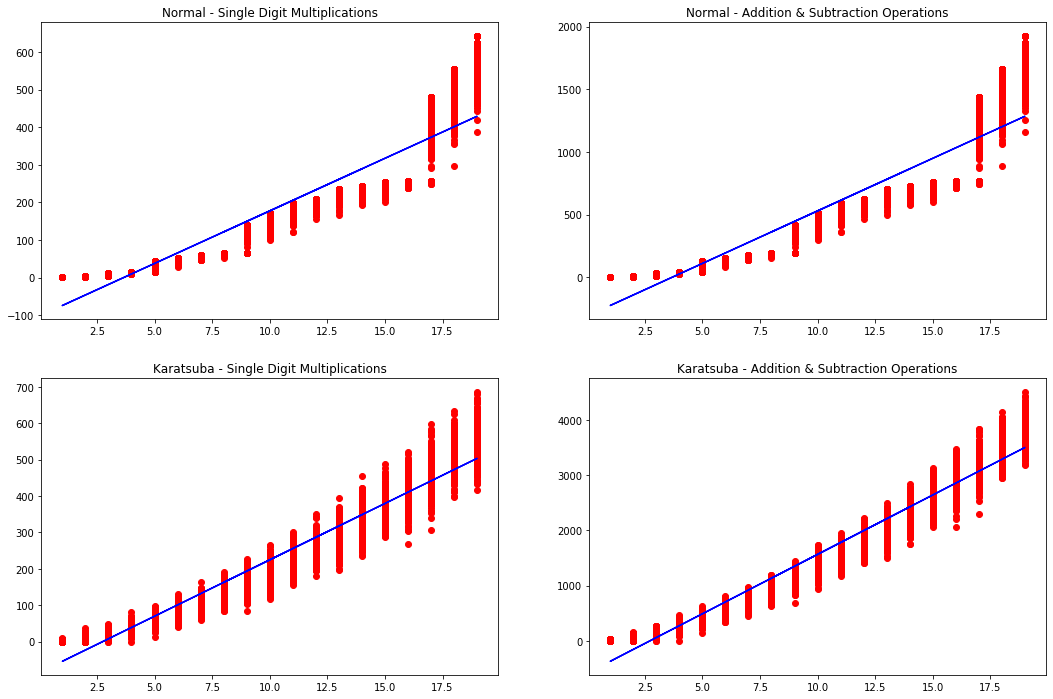

In [448]:
arrayK = np.array([])                 # Array for k-digit points
arraySDM_normal = np.array([])        # Array for SDM in normal multiplication
arrayASO_normal = np.array([])        # Array for ASO in normal multiplication
arraySDM_karatsuba = np.array([])     # Array for SDM in Karatsuba multiplication
arrayASO_karatsuba = np.array([])     # Array for ASO in Karatsuba multiplication

# More the iterations, more are the points for plotting graph.
for itr in range(ITERATIONS):
    

  # Choose K randomly between 0, 20 both excluding.
  # K is the number of digits in both the numbers to be multiplied
  K = random.randrange(1, 20)

  # Generate random string (with digits only) having length K and then converting to int. 
  # a, b will be the two numbers to be multiplied. 
  a = int(''.join(random.choices(string.digits, k = K)))
  b = int(''.join(random.choices(string.digits, k = K)))

  # print('\n\nITERATION ', itr + 1, '\n\n', 'a:', a, '\t b:', b, '\t K:', K, '\n\n')

  # Standard Multiplication:
  sdm = aso = 0
  product = normal_multiply(a, b, method='school')      # Available methods: school, add
  
  arraySDM_normal = np.append(arraySDM_normal, sdm)
  arrayASO_normal = np.append(arrayASO_normal, aso)

  # print('Normal Multiplication:\n\n',' - Result: ', product, '\n - Single Digit Multiplications (SDM): ', sdm, '\n - Addition/Subtraction Operations (ASO): ', aso, '\n - Total Operations (SDM + ASO): ', sdm+aso, sep='')


  # Karatsuba Multiplication:
  karatsuba_method = 'bit'                              # Available methods: bit, add
  sdm = aso = 0
  product = karatsuba_multiply(a, b)

  arraySDM_karatsuba = np.append(arraySDM_karatsuba, sdm)
  arrayASO_karatsuba = np.append(arrayASO_karatsuba, aso)

  # print('\n\n\n', 'Karatsuba Multiplication:\n\n',' - Result: ', product, '\n - Single Digit Multiplications (SDM): ', sdm, '\n - Addition/Subtraction Operations (ASO): ', aso, '\n - Total Operations (SDM + ASO): ', sdm+aso, sep='')

  arrayK = np.append(arrayK, K)


fig, axs = plt.subplots(2, 2)
plt.rcParams["figure.figsize"] = (18, 12)

scatterPlot(arrayK, arraySDM_normal, axs[0, 0], 'Normal - Single Digit Multiplications')
scatterPlot(arrayK, arrayASO_normal, axs[0, 1], 'Normal - Addition & Subtraction Operations')
scatterPlot(arrayK, arraySDM_karatsuba, axs[1, 0], 'Karatsuba - Single Digit Multiplications')
scatterPlot(arrayK, arrayASO_karatsuba, axs[1, 1], 'Karatsuba - Addition & Subtraction Operations')

